In [1]:
import astropy
import matplotlib
import numpy as np

from astropy.io import fits
from astropy.wcs import WCS

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = (12, 9)

In [3]:
file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/MG_Stream_fg/the actual cube!.fits')
file.info()
file[0].header

Filename: /Users/FRANNYPACK/Downloads/grind!/research/Data/MG_Stream_fg/the actual cube!.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      90   (3551, 4151, 112)   float32   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 3551                                                  
NAXIS2  =                 4151                                                  
NAXIS3  =                  112                                                  
BUNIT   = 'K       '  /                                                         
DATE-OBS= '2020-05-09T21:46:39.0'  /                                            
TELESCOP= 'ASKAP   '  /                                                         
CRPIX1  =    1.90200000000E+03  /                                               
CDELT1  =   -1.94444444444E-03  /                                               
CRVAL1  =    2.62307458333E+01  /                                               
CTYPE1  = 'RA---SIN'  /     

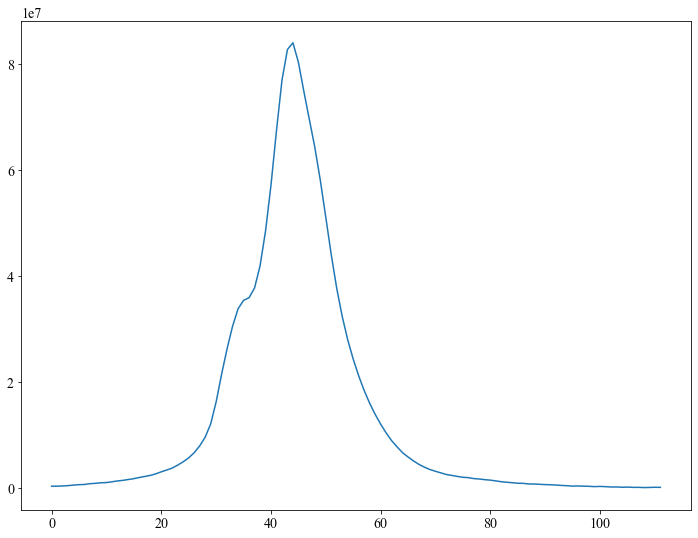

In [8]:
# velocity vs brightness intensity
sum_data = np.nansum(np.nansum(file[0].data, axis = 1), axis = 1)
plt.plot(sum_data)

In [9]:
# gets index of a specific velocity
def v_indx(v_val): # v_val must be in m/s
    v_indx = int((v_val - (4.27666857176 * 10 ** 4)) / (-9.77134909754 * 10 ** 2))
    return v_indx

In [21]:
# gets channel maps

def chan_map(v_indx, v, vmin, vmax):
    wcs = WCS(file[0].header) # assigning world coordinate system (for the grid lines) 
    ax = plt.subplot(projection = wcs, slices=('x', 'y', v_indx))
    im = ax.imshow(file[0].data[v_indx,:,:], cmap = 'magma', vmin = vmin, vmax = vmax)
    plt.colorbar(im)
    plt.grid(b = True, which = 'major', axis = 'both', linewidth = 1, color = 'white')
    plt.xlabel('Right Ascension', fontsize = 20)
    plt.ylabel('Declination', fontsize = 20)
    ax.set_title('Velocity = ' + str(v) + ' km/s', fontsize = 30)

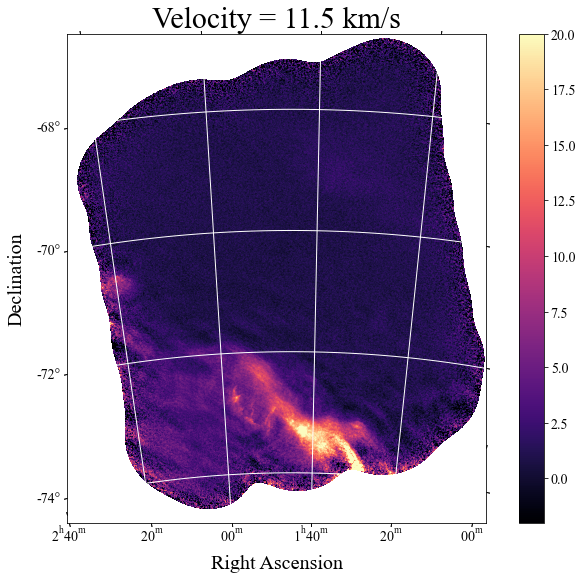

In [24]:
chan_map(v_indx(1.15 * 10 ** 4), 11.5, -2, 20)

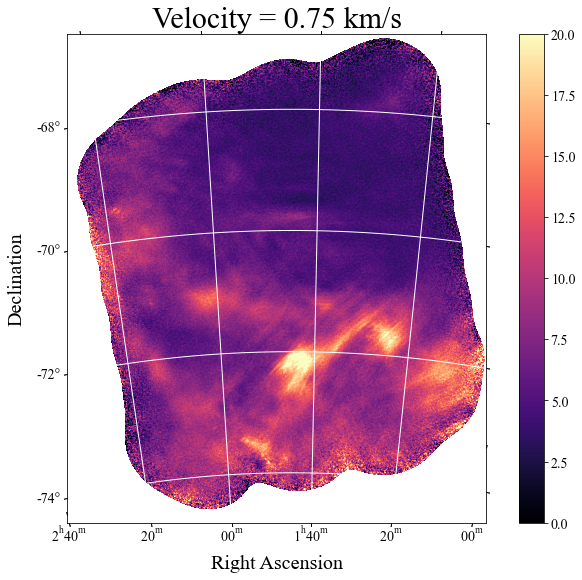

In [18]:
chan_map(v_indx(7.5 * 10 ** 2), 0.75, 0, 20)

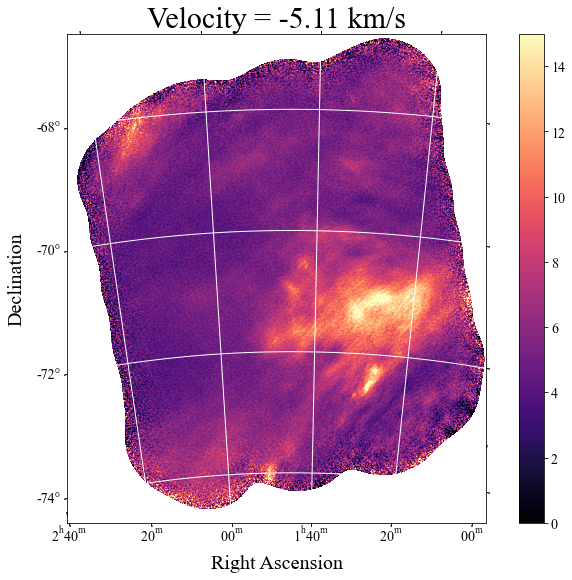

In [26]:
chan_map(v_indx(-5.11 * 10 ** 3), -5.11, 0, 15)